<a href="https://colab.research.google.com/github/Diya1s/deep-learning/blob/main/pract_08_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3456 - val_loss: 0.1617
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1517 - val_loss: 0.1240
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1206 - val_loss: 0.1073
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1058 - val_loss: 0.0969
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0960 - val_loss: 0.0897
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0894 - val_loss: 0.0846
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0845 - val_loss: 0.0812
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0814 - val_loss: 0.0789
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0792 - val_loss: 0.0774
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0768 - val_loss: 0.0755

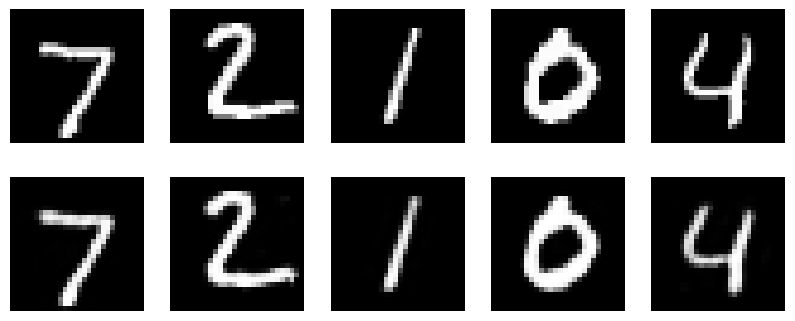

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load and normalize dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256,
                shuffle=True, validation_data=(x_test, x_test))

# Encode and decode test images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original vs reconstructed images
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
